# 2. Vizualizace dat

## Import potřebných balíčků

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Načtení datasetu

In [11]:
df = pd.read_csv('us_births_2016_2021.csv')

## Dataset

In [12]:
df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


Počet záznamů

In [13]:
df.count()

State                            5496
State Abbreviation               5496
Year                             5496
Gender                           5496
Education Level of Mother        5496
Education Level Code             5496
Number of Births                 5496
Average Age of Mother (years)    5496
Average Birth Weight (g)         5496
dtype: int64

Průměrná porodní hmotnost dítěte při narození podle pohlaví

In [14]:
df_boys = df[df['Gender'] == 'M']
df_boys = df_boys.groupby('Year')['Average Birth Weight (g)'].mean().reset_index()
print('Průměrná porodní hmotnost narozeného chlapce v USA v letech 2016-2021')
print(df_boys)

df_girls = df[df['Gender'] == 'F']
df_girls = df_girls.groupby('Year')['Average Birth Weight (g)'].mean().reset_index()
print('Průměrná porodní hmotnost narozené dívky v USA v letech 2016-2021')
print(df_girls)


Průměrná porodní hmotnost narozeného chlapce v USA v letech 2016-2021
   Year  Average Birth Weight (g)
0  2016               3317.613537
1  2017               3314.585120
2  2018               3308.713725
3  2019               3302.666885
4  2020               3302.604585
5  2021               3296.793450
Průměrná porodní hmotnost narozené dívky v USA v letech 2016-2021
   Year  Average Birth Weight (g)
0  2016               3205.614442
1  2017               3197.460917
2  2018               3198.960699
3  2019               3193.183843
4  2020               3190.751092
5  2021               3181.504148


## Vizualizace dat

### Průměrný počet narozených dětí v letech 2016-2021

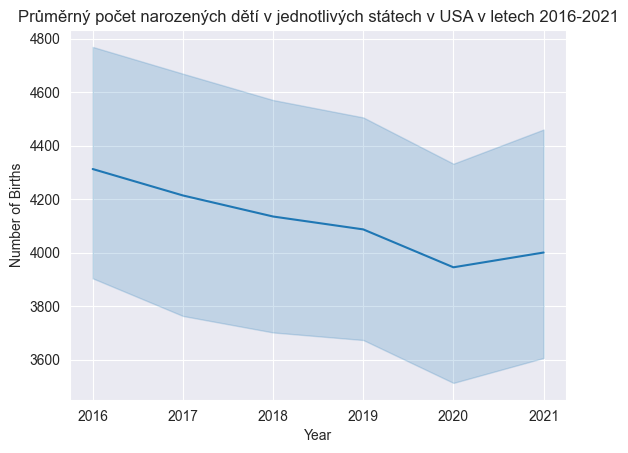

In [15]:
sns.set_style('darkgrid')
sns.lineplot(x='Year', y='Number of Births', data=df)
plt.title('Průměrný počet narozených dětí v jednotlivých státech v USA v letech 2016-2021')
plt.show()

### Průměrný počet narozených dětí v letech 2016-2021 rozdělený v 10 největších státech dle porodnosti

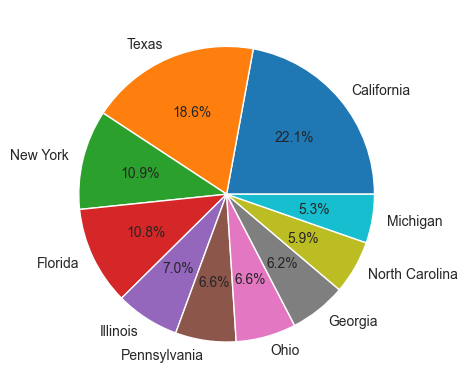

In [16]:
df_states = df.groupby('State')['Number of Births'].sum().reset_index()
df_states = df_states.sort_values(by='Number of Births', ascending=False).head(10)
sns.set_style('darkgrid')
plt.pie(df_states['Number of Births'], labels=df_states['State'], autopct='%1.1f%%')
plt.show()

### Úrověn dosaženého vzdělání matek v Kalifornii

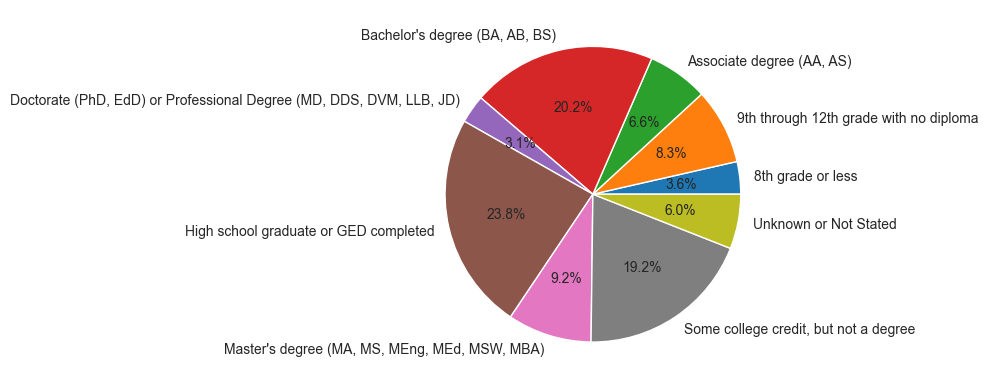

In [17]:
df_california = df[df['State'] == 'California']
df_california = df_california.groupby('Education Level of Mother')['Number of Births'].sum().reset_index()
sns.set_style('darkgrid')
plt.pie(df_california['Number of Births'], labels=df_california['Education Level of Mother'], autopct='%1.1f%%')
plt.show()

### Úrověn dosaženého vzdělání matek v Texasu

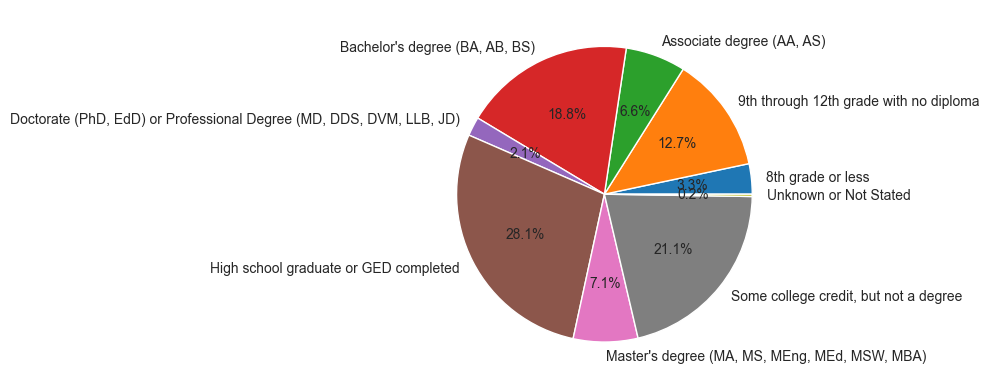

In [18]:
df_texas = df[df['State'] == 'Texas']
df_texas = df_texas.groupby('Education Level of Mother')['Number of Births'].sum().reset_index()
sns.set_style('darkgrid')
plt.pie(df_texas['Number of Births'], labels=df_texas['Education Level of Mother'], autopct='%1.1f%%')
plt.show()

### Úrověn dosaženého vzdělání matek v USA

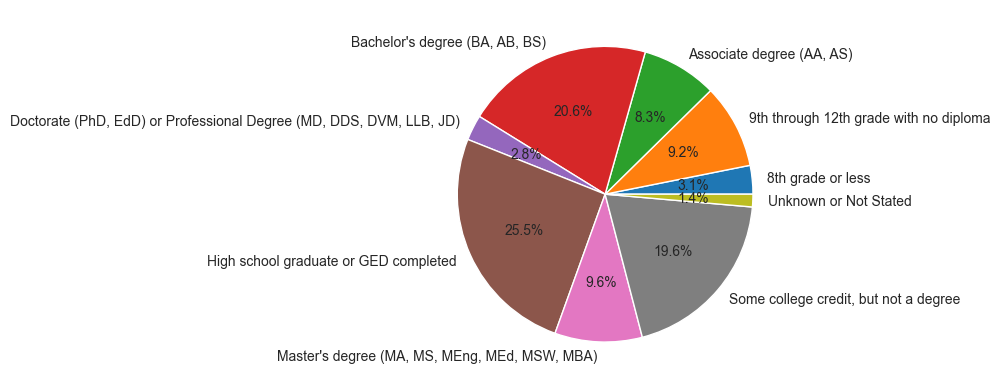

In [19]:
df_usa = df.groupby('Education Level of Mother')['Number of Births'].sum().reset_index()
sns.set_style('darkgrid')
plt.pie(df_usa['Number of Births'], labels=df_usa['Education Level of Mother'], autopct='%1.1f%%')
plt.show()


### Průměrný věk matek v Kalifornii v letech 2016-2021

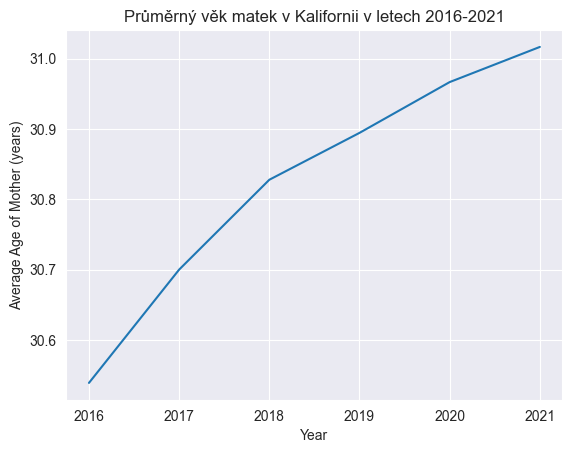

In [20]:
df_california = df[df['State'] == 'California']
df_california = df_california.groupby('Year')['Average Age of Mother (years)'].mean().reset_index()
sns.set_style('darkgrid')
sns.lineplot(x='Year', y='Average Age of Mother (years)', data=df_california)
plt.title('Průměrný věk matek v Kalifornii v letech 2016-2021')
plt.show()


### Průměrný věk matek v Texasu v letech 2016-2021

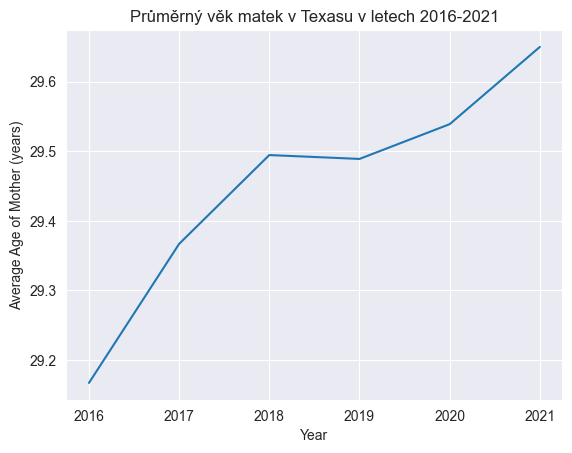

In [21]:
df_texas = df[df['State'] == 'Texas']
df_texas = df_texas.groupby('Year')['Average Age of Mother (years)'].mean().reset_index()
sns.set_style('darkgrid')
sns.lineplot(x='Year', y='Average Age of Mother (years)', data=df_texas)
plt.title('Průměrný věk matek v Texasu v letech 2016-2021')
plt.show()


### Průměrný věk matek v USA v letech 2016-2021

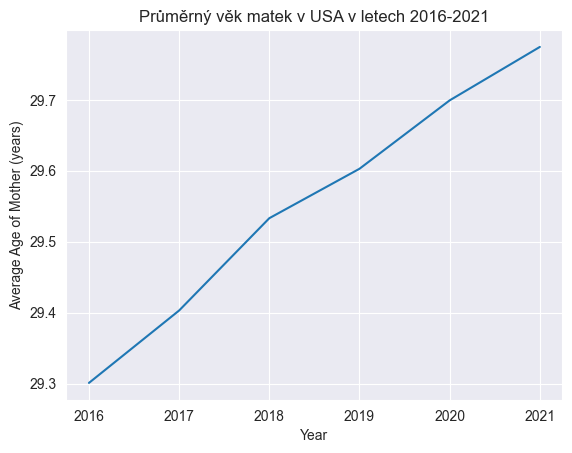

In [22]:
df_usa = df.groupby('Year')['Average Age of Mother (years)'].mean().reset_index()
sns.set_style('darkgrid')
sns.lineplot(x='Year', y='Average Age of Mother (years)', data=df_usa)
plt.title('Průměrný věk matek v USA v letech 2016-2021')
plt.show()


### Průměrná váha narozeného dítěte v USA v letech 2016-2021

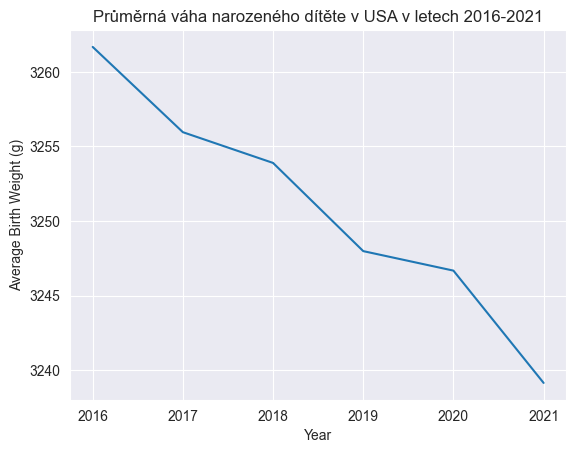

In [23]:
df_usa = df.groupby('Year')['Average Birth Weight (g)'].mean().reset_index()
sns.set_style('darkgrid')
sns.lineplot(x='Year', y='Average Birth Weight (g)', data=df_usa)
plt.title('Průměrná váha narozeného dítěte v USA v letech 2016-2021')
plt.show()


### Průměrná váha při narození (g) vs Průměrný věk matky (years)

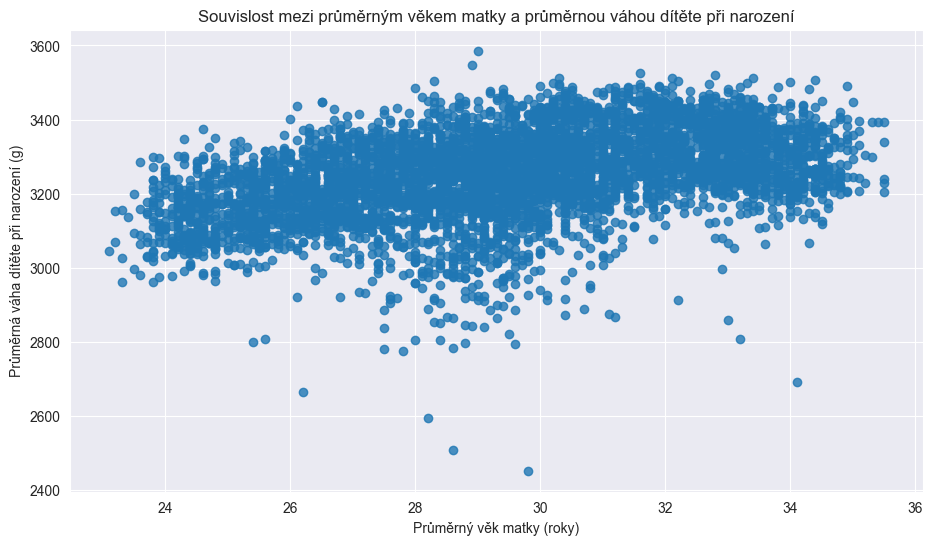

In [37]:
plt.figure(figsize=(11, 6))
plt.scatter(df['Average Age of Mother (years)'], df['Average Birth Weight (g)'], alpha=0.8)
plt.title('Souvislost mezi průměrným věkem matky a průměrnou váhou dítěte při narození')
plt.xlabel('Průměrný věk matky (roky)')
plt.ylabel('Průměrná váha dítěte při narození (g)')
plt.grid(True)
plt.show()

Pearsonův korelační koeficient

In [39]:
correlation_coefficient = df['Average Age of Mother (years)'].corr(df['Average Birth Weight (g)'])
print('Pearsonův korelační koeficient: ', correlation_coefficient)

Pearsonův korelační koeficient:  0.4420694136695039
